# Financial Data Set Basetable Creation

#### Prepared by ABDALLAH Haitham, SCHNEEGANS Josephine, VERAYO Jea

### A. Importing Data

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
directory = r'C:\\Users\\jverayo\\Downloads\\Python\\FP_GroupProject_Group5\\FP_GroupProject_Group5\\data\\raw\\data_berka\\'

In [3]:
# Import banking data

trans = pd.read_csv(directory + "trans.asc", sep=";", low_memory=False)
disp = pd.read_csv(directory + "disp.asc", sep=";")
account = pd.read_csv(directory + "account.asc", sep=";")
Loan = pd.read_table(directory + "loan.asc",sep=";")
Credit_Card = pd.read_table(directory + "card.asc",sep=";")
Client = pd.read_table(directory + "client.asc",sep=";")
disp = pd.read_table(directory + "disp.asc",sep=";")
order = pd.read_table(directory + "order.asc",sep=";")
demo = pd.read_table(directory +"district.asc",sep=";")

### B. Data Correction and Transformation by Data Set

#### 1. Transaction

In [4]:
# Check for missing values - operation, k_symbol, bank, and account all have missing values depending on the transaction type
# All columns with missing values are nominal variables
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [5]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [6]:
trans.shape

(1056320, 10)

In [7]:
#Check unique values in Type Column
print(pd.unique(trans['type']))

['PRIJEM' 'VYDAJ' 'VYBER']


In [8]:
#Correct 'Vyber' type to 'Vydaj'
trans.loc[trans['type'] == 'VYBER', 'type'] = 'VYDAJ'
print(pd.unique(trans['type']))

['PRIJEM' 'VYDAJ']


In [9]:
#Change date column from int to date format
trans['year'] = trans['date'].astype(str).str[:2].astype(int) + 1900
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,year
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1993
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1993
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1993
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1993
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,1993


In [10]:
#Change date column to date format
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   873206 non-null   object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    574439 non-null   object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
 10  year        1056320 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(4)
memory usage: 84.6+ MB


In [11]:
#Check the unique values in k_symbol
print(pd.unique(trans['k_symbol']))

[nan 'DUCHOD' 'UROK' 'SIPO' 'SLUZBY' ' ' 'POJISTNE' 'SANKC. UROK' 'UVER']


In [12]:
#Replace blank values as NaN
trans['k_symbol'] = trans['k_symbol'].replace(' ', np.nan)
print(pd.unique(trans['k_symbol']))

[nan 'DUCHOD' 'UROK' 'SIPO' 'SLUZBY' 'POJISTNE' 'SANKC. UROK' 'UVER']


In [13]:
#Filter the transactions to 1996
trans_1996 = trans[trans['year'] == 1996]
trans_1996.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,year
252855,732811,2504,1996-01-01,VYDAJ,VYBER KARTOU,900.0,38124.4,NaN,NaN,0.0,1996
252856,800209,2729,1996-01-01,VYDAJ,VYBER,1920.0,34202.7,NaN,NaN,NaN,1996
252857,803553,2738,1996-01-01,VYDAJ,VYBER,6500.0,25685.2,NaN,NaN,NaN,1996
252858,1042686,3566,1996-01-01,VYDAJ,VYBER,1000.0,25919.7,NaN,NaN,NaN,1996
252859,1042689,3566,1996-01-01,VYDAJ,VYBER,500.0,25419.7,NaN,NaN,NaN,1996


In [14]:
#Create a new df to get the account balance per account_id
trans_bal = trans_1996[["account_id","balance", "date"]].drop_duplicates(subset = 'account_id', keep = 'last')
trans_bal.tail()

,account_id,balance,date
449629,1763,67769.5,1996-12-31
449630,1765,19708.1,1996-12-31
449631,1775,15944.5,1996-12-31
449632,1769,34679.4,1996-12-31
449633,1770,68162.9,1996-12-31


In [15]:
# Create transaction summary for each transaction type per client
#https://www.statology.org/pandas-rename-columns-with-dictionary/
type_dict = {"PRIJEM": "credit", "VYDAJ": "wd"}

#monetary
trans_1996_type_amount = trans_1996.pivot_table(index='account_id', columns='type', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_type_amount.rename(columns=type_dict, inplace=True)
trans_1996_type_amount = trans_1996_type_amount.add_suffix('_amount')
trans_1996_type_amount = trans_1996_type_amount.rename(columns={'account_id_amount':'account_id'})

#frequency
trans_1996_type_count = trans_1996.pivot_table(index='account_id', columns='type', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
trans_1996_type_count.rename(columns=type_dict, inplace=True)
trans_1996_type_count = trans_1996_type_count.add_suffix('_count')
trans_1996_type_count = trans_1996_type_count.rename(columns={'account_id_count':'account_id'})

#recency
trans_1996_type_recency = pd.DataFrame({'last_credit_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['type'].isin(['PRIJEM'])].groupby('account_id')['date'].agg('max')),
                                    'last_wd_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['type'].isin(['VYDAJ'])].groupby('account_id')['date'].agg('max')),}).reset_index()
trans_1996_type_recency.iloc[:,1:] = trans_1996_type_recency.iloc[:,1:]/ np.timedelta64(1, 'D')
trans_1996_type_recency = trans_1996_type_recency.replace(np.nan, 999).astype(int)

#add ave transaction size
trans_1996_type_tran_size = pd.DataFrame(trans_1996.groupby(['account_id', 'type'])['amount'].agg('sum')/trans_1996.groupby(['account_id', 'type'])['amount'].agg('size')).reset_index()
trans_1996_type_tran_size = trans_1996_type_tran_size.pivot_table(index='account_id', columns='type', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_type_tran_size.rename(columns=type_dict, inplace=True)
trans_1996_type_tran_size = trans_1996_type_tran_size.add_suffix('_tran_size')
trans_1996_type_tran_size = trans_1996_type_tran_size.rename(columns={'account_id_tran_size':'account_id'})
trans_1996_type_tran_size.iloc[:,1:] = round(trans_1996_type_tran_size.iloc[:,1:],1)

#merge tables
trans_1996_type = trans_1996_type_amount.merge(trans_1996_type_count, on = 'account_id', how = 'outer').merge(trans_1996_type_recency, on = 'account_id', how = 'outer').merge(trans_1996_type_tran_size, on = 'account_id', how = 'outer').fillna(0)
trans_1996_type = pd.merge(trans_1996_type,trans_bal[['account_id', 'balance']], on = 'account_id', how = 'left')
trans_1996_type = trans_1996_type.rename(columns={'balance':'ending_balance_1996'})


#totals
trans_1996_type['total_amount'] = trans_1996_type['credit_amount'] + trans_1996_type['wd_amount']
trans_1996_type['total_tran_count'] = trans_1996_type['credit_count'] + trans_1996_type['wd_count']
trans_1996_type['ave_tran_size'] = round((trans_1996_type['total_amount']/trans_1996_type['total_tran_count']),1)
trans_1996_type['last_tran_in_days'] = trans_1996_type[['last_credit_in_days','last_wd_in_days']].max(axis=1)


trans_1996_type.head()

,account_id,credit_amount,wd_amount,credit_count,wd_count,last_credit_in_days,last_wd_in_days,credit_tran_size,wd_tran_size,ending_balance_1996,total_amount,total_tran_count,ave_tran_size,last_tran_in_days
0,1,50066.0,55579.2,29,45,0,0,1726.4,1235.1,12674.5,105645.2,74,1427.6,0
1,2,288542.9,274574.2,29,56,0,0,9949.8,4903.1,53405.5,563117.1,85,6624.9,0
2,4,56920.5,31977.6,17,22,0,0,3348.3,1453.5,24957.6,88898.1,39,2279.4,0
3,6,81507.7,81803.2,24,39,0,0,3396.2,2097.5,33523.8,163310.9,63,2592.2,0
4,7,34905.4,6600.0,3,1,0,7,11635.1,6600.0,28305.4,41505.4,4,10376.4,7


In [16]:
# Create transaction summary for each transaction k_symbol per client
#https://www.statology.org/pandas-rename-columns-with-dictionary/
k_symbol_dict = {"POJISTNE": "insurance_pmt", "SLUZBY": "statement_pmt",
                 "UROK": "interest_credited", "SANKC. UROK": "sanction_interest",
                 "SIPO": "household_pmt", "DUCHOD": "old_age_pension",
                 "UVER": "loan_pmt"}
#monetary
trans_1996_k_symbol_amount = trans_1996.pivot_table(index='account_id', columns='k_symbol', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_k_symbol_amount.rename(columns=k_symbol_dict, inplace=True)
trans_1996_k_symbol_amount = trans_1996_k_symbol_amount.add_suffix('_amount')
trans_1996_k_symbol_amount = trans_1996_k_symbol_amount.rename(columns={'account_id_amount':'account_id'})

#frequency
trans_1996_k_symbol_count = trans_1996.pivot_table(index='account_id', columns='k_symbol', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
trans_1996_k_symbol_count.rename(columns=k_symbol_dict, inplace=True)
trans_1996_k_symbol_count = trans_1996_k_symbol_count.add_suffix('_count')
trans_1996_k_symbol_count = trans_1996_k_symbol_count.rename(columns={'account_id_count':'account_id'})

#recency
trans_1996_k_symbol_recency = pd.DataFrame({'last_insurance_payments_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['POJISTNE'])].groupby('account_id')['date'].agg('max')),
                                    'last_statement_payments_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['SLUZBY'])].groupby('account_id')['date'].agg('max')),
                                    'last_interest_credited_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['UROK'])].groupby('account_id')['date'].agg('max')),
                                    'last_sanction_interest_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['SANKC. UROK'])].groupby('account_id')['date'].agg('max')),
                                    'last_household_payments_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['SIPO'])].groupby('account_id')['date'].agg('max')),
                                    'last_oldage_pension_credited_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['DUCHOD'])].groupby('account_id')['date'].agg('max')),
                                    'last_loan_payments_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['k_symbol'].isin(['UVER'])].groupby('account_id')['date'].agg('max')),
                                   }).reset_index()
trans_1996_k_symbol_recency.iloc[:,1:] = trans_1996_k_symbol_recency.iloc[:,1:]/ np.timedelta64(1, 'D')
trans_1996_k_symbol_recency = trans_1996_k_symbol_recency.replace(np.nan, 999).astype(int)

#add ave transaction size
trans_1996_k_symbol_tran_size = pd.DataFrame(trans_1996.groupby(['account_id', 'k_symbol'])['amount'].agg('sum')/trans_1996.groupby(['account_id', 'k_symbol'])['amount'].agg('size')).reset_index()
trans_1996_k_symbol_tran_size = trans_1996_k_symbol_tran_size.pivot_table(index='account_id', columns='k_symbol', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_k_symbol_tran_size.rename(columns=k_symbol_dict, inplace=True)
trans_1996_k_symbol_tran_size = trans_1996_k_symbol_tran_size.add_suffix('_tran_size')
trans_1996_k_symbol_tran_size = trans_1996_k_symbol_tran_size.rename(columns={'account_id_tran_size':'account_id'})
trans_1996_k_symbol_tran_size.iloc[:,1:] = round(trans_1996_k_symbol_tran_size.iloc[:,1:],1)

#merge tables
trans_1996_k_symbol = trans_1996_k_symbol_amount.merge(trans_1996_k_symbol_count, on = 'account_id', how = 'outer').merge(trans_1996_k_symbol_recency, on = 'account_id', how = 'outer').merge(trans_1996_k_symbol_tran_size, on = 'account_id', how = 'outer').fillna(0)
trans_1996_k_symbol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3437 entries, 0 to 3436
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   account_id                            3437 non-null   int64  
 1   old_age_pension_amount                3437 non-null   float64
 2   insurance_pmt_amount                  3437 non-null   float64
 3   sanction_interest_amount              3437 non-null   float64
 4   household_pmt_amount                  3437 non-null   float64
 5   statement_pmt_amount                  3437 non-null   float64
 6   interest_credited_amount              3437 non-null   float64
 7   loan_pmt_amount                       3437 non-null   float64
 8   old_age_pension_count                 3437 non-null   int32  
 9   insurance_pmt_count                   3437 non-null   int32  
 10  sanction_interest_count               3437 non-null   int32  
 11  household_pmt_cou

In [17]:
# Create transaction summary for each operation per client
#https://www.statology.org/pandas-rename-columns-with-dictionary/
operation_dict = {"VYBER KARTOU": "credit_card_wd","VKLAD": "credit_cash",
                  "PREVOD Z UCTU": "collection_other_bank","VYBER": "cash_wd",
                  "PREVOD NA UCET": "remittance_other_bank"}
#monetary
trans_1996_operation_amount = trans_1996.pivot_table(index='account_id', columns='operation', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_operation_amount.rename(columns=operation_dict, inplace=True)
trans_1996_operation_amount = trans_1996_operation_amount.add_suffix('_amount')
trans_1996_operation_amount = trans_1996_operation_amount.rename(columns={'account_id_amount':'account_id'})

#frequency
trans_1996_operation_count = trans_1996.pivot_table(index='account_id', columns='operation', values='amount', aggfunc='count').reset_index().replace(np.nan, 0).astype(int)
trans_1996_operation_count.rename(columns=operation_dict, inplace=True)
trans_1996_operation_count = trans_1996_operation_count.add_suffix('_count')
trans_1996_operation_count = trans_1996_operation_count.rename(columns={'account_id_count':'account_id'})

#recency
trans_1996_operation_recency = pd.DataFrame({'last_credit_card_wd_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['operation'].isin(['VYBER KARTOU'])].groupby('account_id')['date'].agg('max')),
                                    'last_credit_cash_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['operation'].isin(['VKLAD'])].groupby('account_id')['date'].agg('max')),
                                    'last_collection_other_bank_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['operation'].isin(['PREVOD Z UCTU'])].groupby('account_id')['date'].agg('max')),
                                    'last_cash_wd_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['operation'].isin(['VYBER'])].groupby('account_id')['date'].agg('max')),
                                    'last_remittance_other_bank_in_days': datetime(1996,12,31)-(trans_1996[trans_1996['operation'].isin(['PREVOD NA UCET'])].groupby('account_id')['date'].agg('max')),}).reset_index()
trans_1996_operation_recency.iloc[:,1:] = trans_1996_operation_recency.iloc[:,1:]/ np.timedelta64(1, 'D')
trans_1996_operation_recency = trans_1996_operation_recency.replace(np.nan, 999).astype(int)

#add ave transaction size
trans_1996_operation_tran_size = pd.DataFrame(trans_1996.groupby(['account_id', 'operation'])['amount'].agg('sum')/trans_1996.groupby(['account_id', 'operation'])['amount'].agg('size')).reset_index()
trans_1996_operation_tran_size = trans_1996_operation_tran_size.pivot_table(index='account_id', columns='operation', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
trans_1996_operation_tran_size.rename(columns=operation_dict, inplace=True)
trans_1996_operation_tran_size = trans_1996_operation_tran_size.add_suffix('_tran_size')
trans_1996_operation_tran_size = trans_1996_operation_tran_size.rename(columns={'account_id_tran_size':'account_id'})
trans_1996_operation_tran_size.iloc[:,1:] = round(trans_1996_operation_tran_size.iloc[:,1:],1)

#merge tables
trans_1996_operation = trans_1996_operation_amount.merge(trans_1996_operation_count, on = 'account_id', how = 'outer').merge(trans_1996_operation_recency, on = 'account_id', how = 'outer').merge(trans_1996_operation_tran_size, on = 'account_id', how = 'outer').fillna(0)
trans_1996_operation.head()

,account_id,remittance_other_bank_amount,collection_other_bank_amount,credit_cash_amount,cash_wd_amount,credit_card_wd_amount,remittance_other_bank_count,collection_other_bank_count,credit_cash_count,cash_wd_count,...,last_credit_card_wd_in_days,last_credit_cash_in_days,last_collection_other_bank_in_days,last_cash_wd_in_days,last_remittance_other_bank_in_days,remittance_other_bank_tran_size,collection_other_bank_tran_size,credit_cash_tran_size,cash_wd_tran_size,credit_card_wd_tran_size
0,1,29424.0,44148.0,5100.0,26155.2,0.0,12,12,5,33,...,999,138,18,0,26,2452.0,3679.0,1020.0,792.6,0.0
1,2,87192.0,263068.0,23500.0,187382.2,0.0,12,12,5,44,...,999,84,19,0,26,7266.0,21922.3,4700.0,4258.7,0.0
2,4,18100.0,55530.0,800.0,13877.6,0.0,11,10,1,11,...,999,314,20,0,18,1645.5,5553.0,800.0,1261.6,0.0
3,6,47448.0,80028.0,0.0,34355.2,0.0,12,12,0,27,...,999,999,20,0,19,3954.0,6669.0,0.0,1272.4,0.0
4,7,0.0,0.0,34875.0,6600.0,0.0,0,0,2,1,...,999,24,999,7,999,0.0,0.0,17437.5,6600.0,0.0


In [18]:
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
#Merge all trans table 1996 into 1 table
trans_1996_total = trans_1996_type.merge(trans_1996_k_symbol,on='account_id', how = "left").merge(trans_1996_operation,on='account_id', how = "left").fillna(0)
trans_1996_total.head()

,account_id,credit_amount,wd_amount,credit_count,wd_count,last_credit_in_days,last_wd_in_days,credit_tran_size,wd_tran_size,ending_balance_1996,...,last_credit_card_wd_in_days,last_credit_cash_in_days,last_collection_other_bank_in_days,last_cash_wd_in_days,last_remittance_other_bank_in_days,remittance_other_bank_tran_size,collection_other_bank_tran_size,credit_cash_tran_size,cash_wd_tran_size,credit_card_wd_tran_size
0,1,50066.0,55579.2,29,45,0,0,1726.4,1235.1,12674.5,...,999,138,18,0,26,2452.0,3679.0,1020.0,792.6,0.0
1,2,288542.9,274574.2,29,56,0,0,9949.8,4903.1,53405.5,...,999,84,19,0,26,7266.0,21922.3,4700.0,4258.7,0.0
2,4,56920.5,31977.6,17,22,0,0,3348.3,1453.5,24957.6,...,999,314,20,0,18,1645.5,5553.0,800.0,1261.6,0.0
3,6,81507.7,81803.2,24,39,0,0,3396.2,2097.5,33523.8,...,999,999,20,0,19,3954.0,6669.0,0.0,1272.4,0.0
4,7,34905.4,6600.0,3,1,0,7,11635.1,6600.0,28305.4,...,999,24,999,7,999,0.0,0.0,17437.5,6600.0,0.0


#### 2. Account

In [19]:
#Inspect the columns and data type of the account dataset
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [20]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [21]:
#Rename the date column to date_account_created
account.rename(columns = {'date':'date_account_created'}, inplace = True)
account.head()

,account_id,district_id,frequency,date_account_created
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [22]:
#Change the date column to date format
account['date_account_created'] = pd.to_datetime(account['date_account_created'], format='%y%m%d')
account.head()

,account_id,district_id,frequency,date_account_created
0,576,55,POPLATEK MESICNE,1993-01-01
1,3818,74,POPLATEK MESICNE,1993-01-01
2,704,55,POPLATEK MESICNE,1993-01-01
3,2378,16,POPLATEK MESICNE,1993-01-01
4,2632,24,POPLATEK MESICNE,1993-01-02


In [23]:
# Create column year
#https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
account['year_account_created'], account['month_account_created'], account['day_account_created'], account['weekday_account_created']  = account['date_account_created'].dt.year, account['date_account_created'].dt.month, account['date_account_created'].dt.day, account['date_account_created'].dt.dayofweek
account.head()

,account_id,district_id,frequency,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created
0,576,55,POPLATEK MESICNE,1993-01-01,1993,1,1,4
1,3818,74,POPLATEK MESICNE,1993-01-01,1993,1,1,4
2,704,55,POPLATEK MESICNE,1993-01-01,1993,1,1,4
3,2378,16,POPLATEK MESICNE,1993-01-01,1993,1,1,4
4,2632,24,POPLATEK MESICNE,1993-01-02,1993,1,2,5


In [24]:
#Adding the LOR in days

DV_start_date = datetime.strptime('1997-01-01', "%Y-%m-%d")

account['LOR_in_days'] = DV_start_date - account['date_account_created']
account['LOR_in_days'] = account['LOR_in_days'] / np.timedelta64(1, 'D')
account['LOR_in_days'] = account['LOR_in_days'].astype(int)
account.head()

,account_id,district_id,frequency,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created,LOR_in_days
0,576,55,POPLATEK MESICNE,1993-01-01,1993,1,1,4,1461
1,3818,74,POPLATEK MESICNE,1993-01-01,1993,1,1,4,1461
2,704,55,POPLATEK MESICNE,1993-01-01,1993,1,1,4,1461
3,2378,16,POPLATEK MESICNE,1993-01-01,1993,1,1,4,1461
4,2632,24,POPLATEK MESICNE,1993-01-02,1993,1,2,5,1460


In [25]:
#Create dummy variables for frequency
account['frequency'] = account['frequency'].replace({'POPLATEK MESICNE': 'Monthly', 'POPLATEK PO OBRATU': 'After_Trans', 'POPLATEK TYDNE': 'Weekly'})
account = account.join(pd.get_dummies(account["frequency"], prefix = "Statement_Issuance_", drop_first = False))
account = account.drop(columns=["frequency", "district_id"])
account.head()

,account_id,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created,LOR_in_days,Statement_Issuance__After_Trans,Statement_Issuance__Monthly,Statement_Issuance__Weekly
0,576,1993-01-01,1993,1,1,4,1461,0,1,0
1,3818,1993-01-01,1993,1,1,4,1461,0,1,0
2,704,1993-01-01,1993,1,1,4,1461,0,1,0
3,2378,1993-01-01,1993,1,1,4,1461,0,1,0
4,2632,1993-01-02,1993,1,2,5,1460,0,1,0


In [26]:
#Subset the accounts to accounts created before 1997
account_1996 = account[account['year_account_created'] < 1996]
account_1996.head()

,account_id,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created,LOR_in_days,Statement_Issuance__After_Trans,Statement_Issuance__Monthly,Statement_Issuance__Weekly
0,576,1993-01-01,1993,1,1,4,1461,0,1,0
1,3818,1993-01-01,1993,1,1,4,1461,0,1,0
2,704,1993-01-01,1993,1,1,4,1461,0,1,0
3,2378,1993-01-01,1993,1,1,4,1461,0,1,0
4,2632,1993-01-02,1993,1,2,5,1460,0,1,0


#### 3. Loan

In [27]:
#Display Loan dataframe
Loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [28]:
#Checking for missing Values
Loan.isnull().sum()

loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64

In [29]:
#Change date Format to year-month-day
Loan['date'] = pd.to_datetime(Loan['date'], format='%y%m%d')

#Rename Date Column
Loan.rename(columns={'date': 'loan_date'}, inplace=True)

Loan.head()

,loan_id,account_id,loan_date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [30]:
#Filter issuance date to year 1997
Loan1997 = Loan[(Loan['loan_date'] >= "1997-01-01") & (Loan['loan_date'] <= "1997-12-31") ]
Loan1997.head()

,loan_id,account_id,loan_date,amount,duration,payments,status
328,5895,4473,1997-01-03,93960,60,1566.0,C
329,7122,10365,1997-01-04,260640,36,7240.0,D
330,6173,5724,1997-01-08,232560,48,4845.0,C
331,6142,5591,1997-01-21,221880,60,3698.0,C
332,5358,2018,1997-01-21,38520,12,3210.0,A


In [31]:
#New Loan DataFrame before 1997
Loan_before_1997 = Loan[(Loan['loan_date'] < "1997-01-01")]
Loan_before_1997.head()

,loan_id,account_id,loan_date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [32]:
LoanDummy = pd.get_dummies(Loan_before_1997['status'])
Frames = [Loan_before_1997 , LoanDummy]

Loan_before_1997 = pd.concat(Frames, axis = 1)
Loan_before_1997.head()

,loan_id,account_id,loan_date,amount,duration,payments,status,A,B,C,D
0,5314,1787,1993-07-05,96396,12,8033.0,B,0,1,0,0
1,5316,1801,1993-07-11,165960,36,4610.0,A,1,0,0,0
2,6863,9188,1993-07-28,127080,60,2118.0,A,1,0,0,0
3,5325,1843,1993-08-03,105804,36,2939.0,A,1,0,0,0
4,7240,11013,1993-09-06,274740,60,4579.0,A,1,0,0,0


In [33]:
#Rename Columns from Dummy Variables

Loan_before_1997.rename(columns={'A': 'loan_status_A','B': 'loan_status_B','C': 'loan_status_C','D':'loan_status_D'}, inplace=True)
Loan_before_1997 = Loan_before_1997.drop('status', axis = 1)
Loan_before_1997 = Loan_before_1997.drop('loan_id', axis = 1)

In [34]:
Loan_before_1997.head()

,account_id,loan_date,amount,duration,payments,loan_status_A,loan_status_B,loan_status_C,loan_status_D
0,1787,1993-07-05,96396,12,8033.0,0,1,0,0
1,1801,1993-07-11,165960,36,4610.0,1,0,0,0
2,9188,1993-07-28,127080,60,2118.0,1,0,0,0
3,1843,1993-08-03,105804,36,2939.0,1,0,0,0
4,11013,1993-09-06,274740,60,4579.0,1,0,0,0


In [35]:
Loan1997 = pd.merge(Loan1997,Loan_before_1997,how='outer')
Loan1997

,loan_id,account_id,loan_date,amount,duration,payments,status,loan_status_A,loan_status_B,loan_status_C,loan_status_D
0,5895.0,4473,1997-01-03,93960,60,1566.0,C,NaN,NaN,NaN,NaN
1,7122.0,10365,1997-01-04,260640,36,7240.0,D,NaN,NaN,NaN,NaN
2,6173.0,5724,1997-01-08,232560,48,4845.0,C,NaN,NaN,NaN,NaN
3,6142.0,5591,1997-01-21,221880,60,3698.0,C,NaN,NaN,NaN,NaN
4,5358.0,2018,1997-01-21,38520,12,3210.0,A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
519,NaN,9030,1996-12-12,155616,48,3242.0,NaN,0.0,0.0,1.0,0.0
520,NaN,3189,1996-12-15,222180,60,3703.0,NaN,0.0,0.0,0.0,1.0
521,NaN,8972,1996-12-21,45024,48,938.0,NaN,0.0,0.0,1.0,0.0
522,NaN,10963,1996-12-25,115812,36,3217.0,NaN,0.0,0.0,1.0,0.0


In [36]:
Loan1997['loan_status_A'].isna().sum()

196

In [37]:
Loan1997= Loan1997[['account_id','loan_status_A']]
Loan1997.dtypes

account_id         int64
loan_status_A    float64
dtype: object

In [38]:
Loan1997['loan_granted_1997']= np.where(Loan1997['loan_status_A'].isnull(),1,0)
Loan1997

C:\Users\jverayo\AppData\Local\Temp\ipykernel_18700\2166667473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan1997['loan_granted_1997']= np.where(Loan1997['loan_status_A'].isnull(),1,0)


,account_id,loan_status_A,loan_granted_1997
0,4473,NaN,1
1,10365,NaN,1
2,5724,NaN,1
3,5591,NaN,1
4,2018,NaN,1
...,...,...,...
519,9030,0.0,0
520,3189,0.0,0
521,8972,0.0,0
522,10963,0.0,0


In [39]:
Loan1997=Loan1997.drop('loan_status_A',axis=1)
Loan1997.head()

,account_id,loan_granted_1997
0,4473,1
1,10365,1
2,5724,1
3,5591,1
4,2018,1


In [40]:
Loan1997['loan_granted_1997'].value_counts()

0    328
1    196
Name: loan_granted_1997, dtype: int64

#### 4. Client

In [41]:
#Display Client dataframe 
Client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [42]:
#Checking for missing Values
Client.isnull().sum()

client_id       0
birth_number    0
district_id     0
dtype: int64

In [43]:
# Transform the birth day into year
Client['birth_year'] = '19' + Client['birth_number'].astype(str).str[:2]
Client['birth_year'] = Client['birth_year'].astype(int)
Client.head()

,client_id,birth_number,district_id,birth_year
0,1,706213,18,1970
1,2,450204,1,1945
2,3,406009,1,1940
3,4,561201,5,1956
4,5,605703,5,1960


In [44]:
# Transform the birth day to day
Client['birth_day'] = Client['birth_number'].astype(str).str[-2:].astype(int)
Client.head()

,client_id,birth_number,district_id,birth_year,birth_day
0,1,706213,18,1970,13
1,2,450204,1,1945,4
2,3,406009,1,1940,9
3,4,561201,5,1956,1
4,5,605703,5,1960,3


In [45]:
# Extract the birth month
Client['birth_month'] = Client['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
Client['gender'] = 'M'
Client.loc[Client['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
Client.loc[Client['birth_month'] > 50, 'birth_month'] = Client.loc[Client['birth_month'] > 50, 'birth_month'] - 50
Client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender
0,1,706213,18,1970,13,12,F
1,2,450204,1,1945,4,2,M
2,3,406009,1,1940,9,10,F
3,4,561201,5,1956,1,12,M
4,5,605703,5,1960,3,7,F


In [46]:
# Age
Client['age'] = 1996 - Client['birth_year']
Client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age
0,1,706213,18,1970,13,12,F,26
1,2,450204,1,1945,4,2,M,51
2,3,406009,1,1940,9,10,F,56
3,4,561201,5,1956,1,12,M,40
4,5,605703,5,1960,3,7,F,36


In [47]:
# Age group
Client['age_group'] = Client['age'] // 10 * 10
Client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,1,706213,18,1970,13,12,F,26,20
1,2,450204,1,1945,4,2,M,51,50
2,3,406009,1,1940,9,10,F,56,50
3,4,561201,5,1956,1,12,M,40,40
4,5,605703,5,1960,3,7,F,36,30


In [48]:
ClientDummy = pd.get_dummies (Client['gender'])
Frames2 = [Client,ClientDummy]
Client = pd.concat(Frames2, axis=1)
Client.head()

,client_id,birth_number,district_id,birth_year,birth_day,birth_month,gender,age,age_group,F,M
0,1,706213,18,1970,13,12,F,26,20,1,0
1,2,450204,1,1945,4,2,M,51,50,0,1
2,3,406009,1,1940,9,10,F,56,50,1,0
3,4,561201,5,1956,1,12,M,40,40,0,1
4,5,605703,5,1960,3,7,F,36,30,1,0


In [49]:
#Rename Gender dummy variables columns
Client.rename(columns={'F': 'Client_Female','M': 'Client_Male'}, inplace=True)


#Remove birth_number column
Client = Client.drop('birth_number' , axis = 1 )

Client.head()

,client_id,district_id,birth_year,birth_day,birth_month,gender,age,age_group,Client_Female,Client_Male
0,1,18,1970,13,12,F,26,20,1,0
1,2,1,1945,4,2,M,51,50,0,1
2,3,1,1940,9,10,F,56,50,1,0
3,4,5,1956,1,12,M,40,40,0,1
4,5,5,1960,3,7,F,36,30,1,0


#### 5. Credit Card

In [50]:
#Display Credit_Card dataframe
Credit_Card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [51]:
#Checking for missing Values
Credit_Card.isnull().sum()

card_id    0
disp_id    0
type       0
issued     0
dtype: int64

In [52]:
#Converting date form to 'datetime' and giving it the form Year-month-day
Credit_Card['issued'] = pd.to_datetime(Credit_Card['issued'], format='%y%m%d %H:%M:%S')

In [53]:
#Rename Columns
Credit_Card.rename(columns={'issued': 'credit_card_issue_date'}, inplace=True)

In [54]:
#Filter issuance date to after 1/1/1997
Credit_Card_1997 = Credit_Card[(Credit_Card['credit_card_issue_date'] >= "1997-01-01") & (Credit_Card['credit_card_issue_date'] <= "1997-12-31") ]
Credit_Card_1997.head()

,card_id,disp_id,type,credit_card_issue_date
201,1118,11393,classic,1997-01-02
202,175,1040,classic,1997-01-03
203,565,3601,gold,1997-01-06
204,714,4638,classic,1997-01-09
205,137,786,junior,1997-01-10


In [55]:
Credit_Card_1997

,card_id,disp_id,type,credit_card_issue_date
201,1118,11393,classic,1997-01-02
202,175,1040,classic,1997-01-03
203,565,3601,gold,1997-01-06
204,714,4638,classic,1997-01-09
205,137,786,junior,1997-01-10
...,...,...,...,...
438,566,3606,classic,1997-12-25
439,575,3667,gold,1997-12-25
440,154,887,classic,1997-12-28
441,130,722,classic,1997-12-29


In [56]:
#New Loan DataFrame before 1997
Credit_Card_before_1997 = Credit_Card[(Credit_Card['credit_card_issue_date'] < "1997-01-01") ]
Credit_Card_before_1997

,card_id,disp_id,type,credit_card_issue_date
0,1005,9285,classic,1993-11-07
1,104,588,classic,1994-01-19
2,747,4915,classic,1994-02-05
3,70,439,classic,1994-02-08
4,577,3687,classic,1994-02-15
...,...,...,...,...
196,162,967,junior,1996-12-23
197,594,3794,junior,1996-12-27
198,609,3893,classic,1996-12-29
199,1111,11288,classic,1996-12-31


In [57]:
#Convert nominal values in gender to numeric
CreditDummy = pd.get_dummies(Credit_Card_before_1997['type'])
Frames1 = [Credit_Card_before_1997 , CreditDummy]
Credit_Card_before_1997 = pd.concat(Frames1, axis = 1)
Credit_Card_before_1997.head()

,card_id,disp_id,type,credit_card_issue_date,classic,gold,junior
0,1005,9285,classic,1993-11-07,1,0,0
1,104,588,classic,1994-01-19,1,0,0
2,747,4915,classic,1994-02-05,1,0,0
3,70,439,classic,1994-02-08,1,0,0
4,577,3687,classic,1994-02-15,1,0,0


In [58]:
#Rename Columns

Credit_Card_before_1997.rename(columns={'classic': 'credit_type_classic','gold': 'credit_type_gold','junior': 'credit_type_junior'}, inplace=True)

Credit_Card_before_1997 = Credit_Card_before_1997.drop('type', axis = 1)
Credit_Card_before_1997 = Credit_Card_before_1997.drop('card_id', axis = 1)

Credit_Card_before_1997.head()

,disp_id,credit_card_issue_date,credit_type_classic,credit_type_gold,credit_type_junior
0,9285,1993-11-07,1,0,0
1,588,1994-01-19,1,0,0
2,4915,1994-02-05,1,0,0
3,439,1994-02-08,1,0,0
4,3687,1994-02-15,1,0,0


In [59]:
Credit_Card_1997 = pd.merge(Credit_Card_1997,Credit_Card_before_1997,how='outer')
Credit_Card_1997

,card_id,disp_id,type,credit_card_issue_date,credit_type_classic,credit_type_gold,credit_type_junior
0,1118.0,11393,classic,1997-01-02,NaN,NaN,NaN
1,175.0,1040,classic,1997-01-03,NaN,NaN,NaN
2,565.0,3601,gold,1997-01-06,NaN,NaN,NaN
3,714.0,4638,classic,1997-01-09,NaN,NaN,NaN
4,137.0,786,junior,1997-01-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...
438,NaN,967,NaN,1996-12-23,0.0,0.0,1.0
439,NaN,3794,NaN,1996-12-27,0.0,0.0,1.0
440,NaN,3893,NaN,1996-12-29,1.0,0.0,0.0
441,NaN,11288,NaN,1996-12-31,1.0,0.0,0.0


In [60]:
Credit_Card_1997['credit_type_classic'].isna().sum()

242

In [61]:
Credit_Card_1997= Credit_Card_1997[['disp_id','credit_type_classic']]
Credit_Card_1997

,disp_id,credit_type_classic
0,11393,NaN
1,1040,NaN
2,3601,NaN
3,4638,NaN
4,786,NaN
...,...,...
438,967,0.0
439,3794,0.0
440,3893,1.0
441,11288,1.0


In [62]:
Credit_Card_1997['credit_issued_1997']= np.where(Credit_Card_1997['credit_type_classic'].isnull(),1,0)
Credit_Card_1997

C:\Users\jverayo\AppData\Local\Temp\ipykernel_18700\1140483172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Card_1997['credit_issued_1997']= np.where(Credit_Card_1997['credit_type_classic'].isnull(),1,0)


,disp_id,credit_type_classic,credit_issued_1997
0,11393,NaN,1
1,1040,NaN,1
2,3601,NaN,1
3,4638,NaN,1
4,786,NaN,1
...,...,...,...
438,967,0.0,0
439,3794,0.0,0
440,3893,1.0,0
441,11288,1.0,0


In [63]:
Credit_Card_1997 = Credit_Card_1997.drop('credit_type_classic',axis=1)

In [64]:
Credit_Card_1997['credit_issued_1997'].value_counts()

1    242
0    201
Name: credit_issued_1997, dtype: int64

### 6.Disp

In [65]:
# visualisation of disp
print(disp.head())

   disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT


In [66]:
# count of type
number_per_type = disp.groupby('type')['disp_id'].nunique()
number_per_type

type
DISPONENT     869
OWNER        4500
Name: disp_id, dtype: int64

In [67]:
# filter on OWNER
disp_owner = disp[disp['type'].isin(['OWNER'])]
disp_owner.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
3,4,4,3,OWNER
5,6,6,4,OWNER
6,7,7,5,OWNER


#### 7. Order

In [68]:
print(order.head())

   order_id  account_id bank_to  account_to  amount k_symbol
0     29401           1      YZ    87144583  2452.0     SIPO
1     29402           2      ST    89597016  3372.7     UVER
2     29403           2      QR    13943797  7266.0     SIPO
3     29404           3      WX    83084338  1135.0     SIPO
4     29405           3      CD    24485939   327.0         


In [69]:
# replace blank value per "NaN" in k_symbol
order['k_symbol'] = order['k_symbol'].replace(' ',np.nan)

In [70]:
number_bank_to = order.groupby('bank_to', as_index=True, sort=True).agg({'order_id':'count', 'amount':'sum'})
number_bank_to.head()

,order_id,amount
bank_to,,
AB,519,1707389.5
CD,458,1498209.4
EF,483,1698275.0
GH,487,1603264.8
IJ,496,1626195.4


In [71]:
#group by k symbol and see the count amount and the order
number_k_symbol = order.groupby('k_symbol', as_index=True, sort=True).agg({'order_id':'count', 'amount':'sum'})
number_k_symbol.head()

,order_id,amount
k_symbol,,
LEASING,341,759527.1
POJISTNE,532,686927.0
SIPO,3502,13965417.0
UVER,717,3035184.5


In [72]:
#group by bank_to and k symbol and see the count amount and the order
number_bank_k = order.groupby(['bank_to','k_symbol'], as_index=True, sort=True).agg({'order_id':'count', 'amount':'sum'})
number_bank_k.head()

order_id     amount
bank_to k_symbol                     
AB      LEASING         24    57444.0
        POJISTNE        46    79952.0
        SIPO           278  1111015.0
        UVER            58   238914.5
CD      LEASING         23    47677.3

In [73]:
# Create dummy variable for k_symbol
order2 = pd.get_dummies(order, columns=['k_symbol'])
order

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,NaN
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,NaN
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,NaN


In [74]:
# create a table group by client
order_client = pd.DataFrame({'total_order': order2.groupby('account_id')['order_id'].agg('count'),
                             'total_recurring_amount': order2.groupby('account_id')['amount'].agg('sum'),
                            'total_recurring_leasing': order2.groupby('account_id')['k_symbol_LEASING'].agg('sum'),
                            'total_recurring_insurance': order2.groupby('account_id')['k_symbol_POJISTNE'].agg('sum'),
                             'total_recurring_household': order2.groupby('account_id')['k_symbol_SIPO'].agg('sum'),
                            'total_recurring_loan_payment': order2.groupby('account_id')['k_symbol_UVER'].agg('sum')})
order_client = order_client.reset_index()
order_client.head()


,account_id,total_order,total_recurring_amount,total_recurring_leasing,total_recurring_insurance,total_recurring_household,total_recurring_loan_payment
0,1,1,2452.0,0,0,1,0
1,2,2,10638.7,0,0,1,1
2,3,3,5001.0,0,1,1,0
3,4,2,3363.0,0,0,2,0
4,5,1,2668.0,0,0,1,0


In [75]:
#order_monetary
order_amount = order.pivot_table(index='account_id', columns='k_symbol', values='amount', aggfunc='sum').reset_index().replace(np.nan, 0)
order_amount.rename(columns=k_symbol_dict, inplace=True)
order_amount = order_amount.add_suffix('_recurring_amount')
order_amount = order_amount.rename(columns={'account_id_order_amount':'account_id'})

order_amount.head()

k_symbol,account_id_recurring_amount,LEASING_recurring_amount,insurance_pmt_recurring_amount,household_pmt_recurring_amount,loan_pmt_recurring_amount
0,1,0.0,0.0,2452.0,0.0
1,2,0.0,0.0,7266.0,3372.7
2,3,0.0,3539.0,1135.0,0.0
3,4,0.0,0.0,3363.0,0.0
4,5,0.0,0.0,2668.0,0.0


#### 7. Demographics

In [76]:
demo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [77]:
# Assign all "?" as NaN values for A15
demo["A15"] = demo["A15"].replace("?", np.nan ).astype(float)
demo.A15.unique()

array([85677.,  2159.,  2824.,  5244.,  2616.,  2640.,  4289.,  5179.,
        2987.,  3810.,  3475.,  3804.,  1597.,  6604.,  1845.,  1874.,
        1003.,  1740.,   999.,  1563.,  2299.,  1089.,  2879.,  5198.,
        1822.,  6041.,  1029.,  1580.,   818.,  2985.,  1328.,  4340.,
        4650.,  5323.,  3384.,  5796.,  4147.,  2653.,  4947.,  6949.,
        6445.,  1658.,  4085.,  2166.,  2080.,  2854.,  6079.,  1655.,
        1660.,  2123.,  3496.,  2564.,  1850., 18721.,  3659.,  3729.,
        2212.,  2595.,  1879.,  2112.,  2719.,  1562.,  4484.,  2157.,
        2247.,  3244.,  5623.,    nan,  9878.,  4980.,  9672.,  4355.,
       18782.,  4063.,  3736.,  3460.])

In [78]:
# Create a rate for the crime in 1996 (comparative of 1995)
demo["rate_crime_96"] = (((demo.A16/demo.A15)-1)*100)
print(demo.rate_crime_96)

0     15.675152
1     23.853636
2     -0.389518
3     12.356979
4     16.207951
        ...    
72     1.791045
73    -2.316047
74    10.878661
75   -24.866167
76     3.757225
Name: rate_crime_96, Length: 77, dtype: float64


In [79]:
demo['rate_crime_96'] = round(demo.rate_crime_96,2)
print(demo.head())

   A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14      A15    A16  rate_crime_96  
0  12541  0.29  0.43  167  85677.0  99107          15.68  
1   8507  1.67  1.85  132   2159.0   2674          23.85  
2   8980  1.95  2.21  111   2824.0   2813          -0.39  
3   9753  4.64  5.05  109   5244.0   5892          12.36  
4   9307  3.85  4.43  118   2616.0   3040          16.21  


In [80]:
#assign all "?" as na value for A12
demo["A12"] = demo["A12"].replace("?", np.nan ).astype(float)

In [81]:
#create a new variable for number of municipalities
demo['num_mun'] = sum(demo.A5,demo.A6) + sum(demo.A7,demo.A8)
demo.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,rate_crime_96,num_mun
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107,15.68,4228
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674,23.85,4255
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813,-0.39,4254
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892,12.36,4258
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040,16.21,4258


In [83]:
demo = demo.rename(columns = {'A1':'district_id', 'A2':'district_name', 'A3':'region', 'A4':'population', 'A5':'mun_499', 'A6':'mun_500_1999', 'A7':'mun_2000_9999', 'A8':'mun_10000', 'A9':'nb_cities', 'A10':'ratio_urb_pop', 'A11':'avg_salary', 'A12':'unemployement_rate_95', 'A13':'unemployement_rate_96', 'A14': 'entrepreneurs_per_1000', 'A15':'nb_crimes_95', 'A16':'nb_crimes_96'})

In [84]:
demo.head()

,district_id,district_name,region,population,mun_499,mun_500_1999,mun_2000_9999,mun_10000,nb_cities,ratio_urb_pop,avg_salary,unemployement_rate_95,unemployement_rate_96,entrepreneurs_per_1000,nb_crimes_95,nb_crimes_96,rate_crime_96,num_mun
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107,15.68,4228
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674,23.85,4255
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813,-0.39,4254
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892,12.36,4258
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040,16.21,4258


### C. Merging Data Sets

In [85]:
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
#Merge all tables into 1 table
#base_table = disp.merge(account,on='account_id', how = "right").merge(trans_1996_operation,on='account_id', how = "left")
base_table = disp_owner.merge(account_1996,on='account_id', how = "right").merge(Client,on='client_id', how = "left").merge(trans_1996_total,on='account_id', how = "left").merge(Credit_Card_before_1997,on='disp_id', how = "left").merge(Loan_before_1997,on='account_id', how = "left").merge(order_client,on='account_id', how = "left").merge(demo,on='district_id', how = "left").fillna(0)
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Columns: 118 entries, disp_id to num_mun
dtypes: datetime64[ns](1), float64(66), int32(22), int64(18), object(6), uint8(5)
memory usage: 1.8+ MB


In [86]:
base_table=base_table.merge(Loan1997,on='account_id', how = "left").merge(Credit_Card_1997,on='disp_id',how="left").fillna(0)
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Columns: 120 entries, disp_id to credit_issued_1997
dtypes: datetime64[ns](1), float64(68), int32(22), int64(18), object(6), uint8(5)
memory usage: 1.8+ MB


In [87]:
base_table.head()

,disp_id,client_id,account_id,type,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created,LOR_in_days,...,avg_salary,unemployement_rate_95,unemployement_rate_96,entrepreneurs_per_1000,nb_crimes_95,nb_crimes_96,rate_crime_96,num_mun,loan_granted_1997,credit_issued_1997
0,692,692,576,OWNER,1993-01-01,1993,1,1,4,1461,...,10673,4.75,5.44,100,18782.0,18347,-2.32,4228,0.0,0.0
1,4601,4601,3818,OWNER,1993-01-01,1993,1,1,4,1461,...,12541,0.29,0.43,167,85677.0,99107,15.68,4228,0.0,0.0
2,844,844,704,OWNER,1993-01-01,1993,1,1,4,1461,...,8620,1.10,1.25,100,1089.0,1117,2.57,4244,0.0,0.0
3,2873,2873,2378,OWNER,1993-01-01,1993,1,1,4,1461,...,8427,1.12,1.54,107,1874.0,1913,2.08,4249,0.0,0.0
4,3177,3177,2632,OWNER,1993-01-02,1993,1,2,5,1460,...,8991,1.39,2.01,128,5198.0,5273,1.44,4250,0.0,0.0


In [88]:
base_table['loan_granted_1997'] = base_table['loan_granted_1997'].astype(int)
base_table['credit_issued_1997'] = base_table['credit_issued_1997'].astype(int)
base_table.head()

,disp_id,client_id,account_id,type,date_account_created,year_account_created,month_account_created,day_account_created,weekday_account_created,LOR_in_days,...,avg_salary,unemployement_rate_95,unemployement_rate_96,entrepreneurs_per_1000,nb_crimes_95,nb_crimes_96,rate_crime_96,num_mun,loan_granted_1997,credit_issued_1997
0,692,692,576,OWNER,1993-01-01,1993,1,1,4,1461,...,10673,4.75,5.44,100,18782.0,18347,-2.32,4228,0,0
1,4601,4601,3818,OWNER,1993-01-01,1993,1,1,4,1461,...,12541,0.29,0.43,167,85677.0,99107,15.68,4228,0,0
2,844,844,704,OWNER,1993-01-01,1993,1,1,4,1461,...,8620,1.10,1.25,100,1089.0,1117,2.57,4244,0,0
3,2873,2873,2378,OWNER,1993-01-01,1993,1,1,4,1461,...,8427,1.12,1.54,107,1874.0,1913,2.08,4249,0,0
4,3177,3177,2632,OWNER,1993-01-02,1993,1,2,5,1460,...,8991,1.39,2.01,128,5198.0,5273,1.44,4250,0,0


In [89]:
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Columns: 120 entries, disp_id to credit_issued_1997
dtypes: datetime64[ns](1), float64(66), int32(24), int64(18), object(6), uint8(5)
memory usage: 1.8+ MB


In [90]:
base_table['loan_granted_1997'].value_counts()

0    2208
1      31
Name: loan_granted_1997, dtype: int64

In [91]:
loan_account = Loan1997.merge(account[['account_id', 'year_account_created']], on='account_id', how='left')
loan_account.head()

,account_id,loan_granted_1997,year_account_created
0,4473,1,1995
1,10365,1,1995
2,5724,1,1995
3,5591,1,1996
4,2018,1,1995


In [92]:
loan_account.groupby(["year_account_created"])["loan_granted_1997"].agg("sum")

year_account_created
1993      0
1994      0
1995     31
1996    139
1997     26
Name: loan_granted_1997, dtype: int32

### D. Data Visualization

In [93]:
base_table["loan_granted_1997"].value_counts()

0    2208
1      31
Name: loan_granted_1997, dtype: int64

In [94]:
base_table["credit_issued_1997"].value_counts()

0    2119
1     120
Name: credit_issued_1997, dtype: int64

In [95]:
base_table.columns.values.tolist()

['disp_id',
 'client_id',
 'account_id',
 'type',
 'date_account_created',
 'year_account_created',
 'month_account_created',
 'day_account_created',
 'weekday_account_created',
 'LOR_in_days',
 'Statement_Issuance__After_Trans',
 'Statement_Issuance__Monthly',
 'Statement_Issuance__Weekly',
 'district_id',
 'birth_year',
 'birth_day',
 'birth_month',
 'gender',
 'age',
 'age_group',
 'Client_Female',
 'Client_Male',
 'credit_amount',
 'wd_amount',
 'credit_count',
 'wd_count',
 'last_credit_in_days',
 'last_wd_in_days',
 'credit_tran_size',
 'wd_tran_size',
 'ending_balance_1996',
 'total_amount',
 'total_tran_count',
 'ave_tran_size',
 'last_tran_in_days',
 'old_age_pension_amount',
 'insurance_pmt_amount',
 'sanction_interest_amount',
 'household_pmt_amount',
 'statement_pmt_amount',
 'interest_credited_amount',
 'loan_pmt_amount',
 'old_age_pension_count',
 'insurance_pmt_count',
 'sanction_interest_count',
 'household_pmt_count',
 'statement_pmt_count',
 'interest_credited_count',

In [96]:
#Creating DFs for granted loan and issued cc
granted_loan = base_table[base_table.loan_granted_1997 == 1]
not_granted_loan = base_table[base_table.loan_granted_1997 == 0]

issued_cc = base_table[base_table.credit_issued_1997 == 1]
not_issued_cc = base_table[base_table.credit_issued_1997 == 0]

### LOR

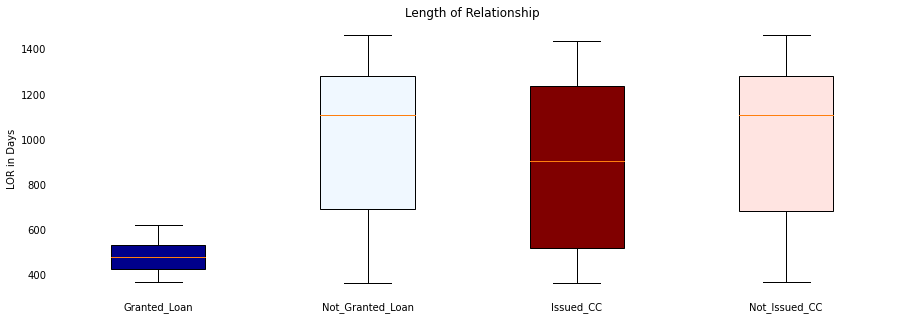

In [97]:
#Creating the side-by-side plot for LOR
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan.LOR_in_days, not_granted_loan.LOR_in_days, issued_cc.LOR_in_days, not_issued_cc.LOR_in_days], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Length of Relationship')
ax.set_ylabel('LOR in Days')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [98]:
#Comparing statistics for LOR in days

print(issued_cc.LOR_in_days.mean())
print(issued_cc.LOR_in_days.var())

print(not_issued_cc.LOR_in_days.mean())
print(not_issued_cc.LOR_in_days.var())

print(stats.ttest_ind(issued_cc.LOR_in_days, not_issued_cc.LOR_in_days, equal_var = False))

print(granted_loan.LOR_in_days.mean())
print(granted_loan.LOR_in_days.var())

print(not_granted_loan.LOR_in_days.mean())
print(not_granted_loan.LOR_in_days.var())

print(stats.ttest_ind(granted_loan.LOR_in_days, not_granted_loan.LOR_in_days, equal_var = False))

900.8416666666667
126181.00833333335
996.0316186880605
111999.97964190162
Ttest_indResult(statistic=-2.864409352340708, pvalue=0.004866266258316733)
485.64516129032256
4794.56989247312
998.0240036231884
111051.61111364212
Ttest_indResult(statistic=-35.789699588905734, pvalue=1.3130100710935762e-38)


### RFM

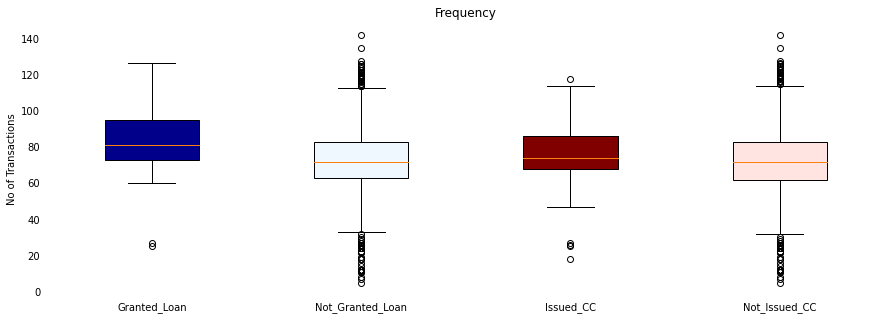

In [99]:
#Creating the side-by-side plot for Frequency
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan.total_tran_count, not_granted_loan.total_tran_count, issued_cc.total_tran_count, not_issued_cc.total_tran_count], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Frequency')
ax.set_ylabel('No of Transactions')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [100]:
#Comparing statistics for frequency

print(issued_cc.total_tran_count.mean())
print(issued_cc.total_tran_count.var())

print(not_issued_cc.total_tran_count.mean())
print(not_issued_cc.total_tran_count.var())

print(stats.ttest_ind(issued_cc.total_tran_count, not_issued_cc.total_tran_count, equal_var = False))

print(granted_loan.total_tran_count.mean())
print(granted_loan.total_tran_count.var())

print(not_granted_loan.total_tran_count.mean())
print(not_granted_loan.total_tran_count.var())

print(stats.ttest_ind(granted_loan.total_tran_count, not_granted_loan.total_tran_count, equal_var = False))

76.28333333333333
310.7929971988797
72.9952807928268
312.9782591161136
Ttest_indResult(statistic=1.9872402553066901, pvalue=0.04895113730340591)
81.64516129032258
453.8365591397849
73.05253623188406
310.47934109519724
Ttest_indResult(statistic=2.2350190567645227, pvalue=0.03286413588726983)


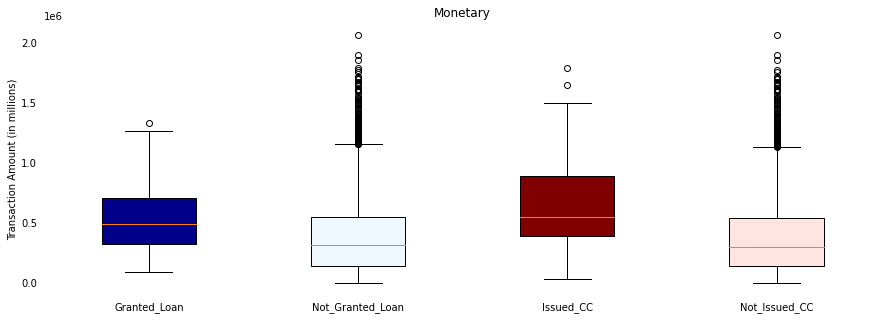

In [101]:
#Creating the side-by-side plot for Monetary
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan.total_amount, not_granted_loan.total_amount, issued_cc.total_amount, not_issued_cc.total_amount], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Monetary')
ax.set_ylabel('Transaction Amount (in millions)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [102]:
#Comparing statistics for monetary

print(issued_cc.total_amount.mean())
print(issued_cc.total_amount.var())

print(not_issued_cc.total_amount.mean())
print(not_issued_cc.total_amount.var())

print(stats.ttest_ind(issued_cc.total_amount, not_issued_cc.total_amount, equal_var = False))

print(granted_loan.total_amount.mean())
print(granted_loan.total_amount.var())

print(not_granted_loan.total_amount.mean())
print(not_granted_loan.total_amount.var())

print(stats.ttest_ind(granted_loan.total_amount, not_granted_loan.total_amount, equal_var = False))

642134.7650000001
151505850243.24347
393259.13284568227
113362157856.8247
Ttest_indResult(statistic=6.860357146438359, pvalue=2.5586198814642515e-10)
559968.7387096774
108693640346.35513
404444.4037137685
118334539447.97905
Ttest_indResult(statistic=2.6066523522962504, pvalue=0.013943164068780937)


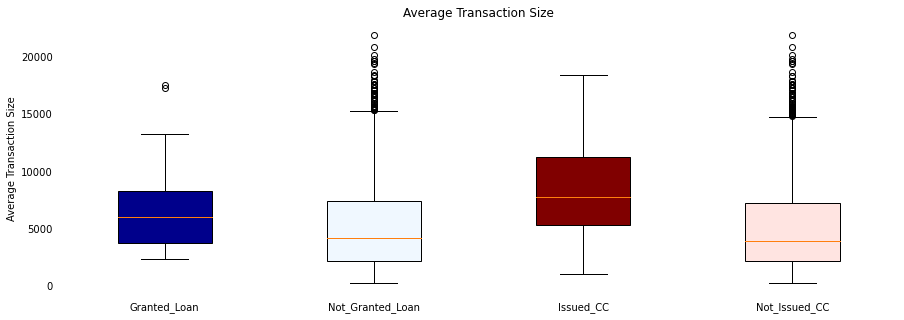

In [103]:
#Creating the side-by-side plot for Average Transaction Size
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan.ave_tran_size, not_granted_loan.ave_tran_size, issued_cc.ave_tran_size, not_issued_cc.ave_tran_size], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Average Transaction Size')
ax.set_ylabel('Average Transaction Size')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [104]:
#Comparing statistics for ave transaction size

#Loan
print(granted_loan.ave_tran_size.mean())
print(granted_loan.ave_tran_size.var())

print(not_granted_loan.ave_tran_size.mean())
print(not_granted_loan.ave_tran_size.var())

print(stats.ttest_ind(granted_loan.ave_tran_size, not_granted_loan.ave_tran_size, equal_var = False))

#Credit Card
print(issued_cc.ave_tran_size.mean())
print(issued_cc.ave_tran_size.var())

print(not_issued_cc.ave_tran_size.mean())
print(not_issued_cc.ave_tran_size.var())

print(stats.ttest_ind(issued_cc.ave_tran_size, not_issued_cc.ave_tran_size, equal_var = False))

6860.406451612905
16198050.11795699
5280.422282608711
15585117.98245751
Ttest_indResult(statistic=2.171143338818876, pvalue=0.03774239261367181)
8200.026666666667
17068707.35659384
5138.19811231714
15043793.326814186
Ttest_indResult(statistic=7.923091609142185, pvalue=8.73947526902839e-13)


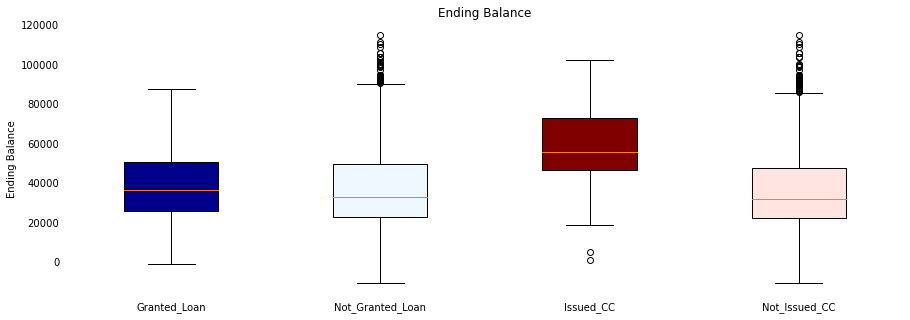

In [105]:
#Creating the side-by-side plot for Ending Balance
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan.ending_balance_1996, not_granted_loan.ending_balance_1996, issued_cc.ending_balance_1996, not_issued_cc.ending_balance_1996], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Ending Balance')
ax.set_ylabel('Ending Balance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [106]:
#Comparing statistics for ending balance
#Loan
print(granted_loan.ending_balance_1996.mean())
print(granted_loan.ending_balance_1996.var())

print(not_granted_loan.ending_balance_1996.mean())
print(not_granted_loan.ending_balance_1996.var())

print(stats.ttest_ind(granted_loan.ending_balance_1996, not_granted_loan.ending_balance_1996, equal_var = False))

#Credit Card
print(issued_cc.ending_balance_1996.mean())
print(issued_cc.ending_balance_1996.var())

print(not_issued_cc.ending_balance_1996.mean())
print(not_issued_cc.ending_balance_1996.var())

print(stats.ttest_ind(issued_cc.ending_balance_1996, not_issued_cc.ending_balance_1996, equal_var = False))

39552.309677419355
395739987.9515699
37708.315896739055
394913859.7971331
Ttest_indResult(statistic=0.5125238676952564, pvalue=0.6119351258738587)
58042.94166666665
367114435.4459805
36583.73294006597
371844366.42498654
Ttest_indResult(statistic=11.931419994122736, pvalue=9.151351983982709e-23)


In [107]:
#creating a df excluding the missing values
granted_loan_recency = granted_loan[granted_loan.last_tran_in_days != 999]
not_granted_loan_recency = not_granted_loan[not_granted_loan.last_tran_in_days != 999]

issued_cc_recency = issued_cc[issued_cc.last_tran_in_days != 999]
not_issued_cc_recency = not_issued_cc[not_issued_cc.last_tran_in_days != 999]

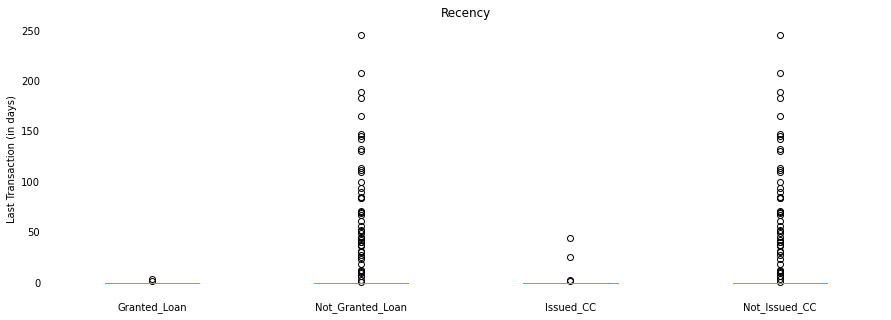

In [108]:
#Creating the side-by-side plot for Recency
fig, ax = plt.subplots(figsize=(15, 5))
box = plt.boxplot([granted_loan_recency.last_tran_in_days, not_granted_loan_recency.last_tran_in_days, issued_cc_recency.last_tran_in_days, not_issued_cc_recency.last_tran_in_days], patch_artist = True)

#Formatting the plot
ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Recency')
ax.set_ylabel('Last Transaction (in days)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

#https://www.pythonprogramming.in/change-box-color-in-boxplot.html
#Changing the colors of the boxes
colors = ['darkblue', 'aliceblue', 'maroon', 'mistyrose'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

In [109]:
#Comparing statistics for recency
#Loan
print(granted_loan_recency.last_tran_in_days.mean())
print(granted_loan_recency.last_tran_in_days.var())

print(not_granted_loan_recency.last_tran_in_days.mean())
print(not_granted_loan_recency.last_tran_in_days.var())

print(stats.ttest_ind(granted_loan_recency.last_tran_in_days, not_granted_loan_recency.last_tran_in_days, equal_var = False))

#Credit Card
print(issued_cc_recency.last_tran_in_days.mean())
print(issued_cc_recency.last_tran_in_days.var())

print(not_issued_cc_recency.last_tran_in_days.mean())
print(not_issued_cc_recency.last_tran_in_days.var())

print(stats.ttest_ind(issued_cc_recency.last_tran_in_days, not_issued_cc_recency.last_tran_in_days, equal_var = False))

0.1935483870967742
0.627956989247312
1.6316266425011328
193.48300655501592
Ttest_indResult(statistic=-4.377462015329442, pvalue=1.3900265524758558e-05)
0.6166666666666667
21.246778711484595
1.6680830972615674
200.4022968433479
Ttest_indResult(statistic=-2.0172039587074075, pvalue=0.044643094381698764)


#### Transaction Types of our Target

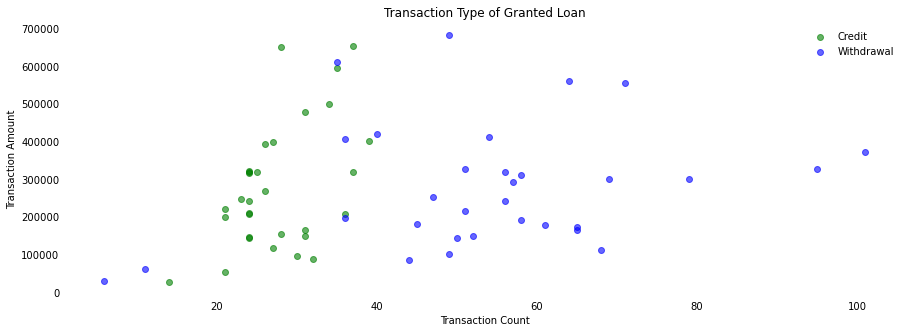

In [110]:
#Creating the scatter plot of transaction types of Granted Loan
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(granted_loan.credit_count, granted_loan.credit_amount, color='green', label='Credit', alpha = 0.6)
ax.scatter(granted_loan.wd_count, granted_loan.wd_amount, color='blue', label='Withdrawal', alpha = 0.6)

#ax.set_xscale('log')
#ax.set_yscale('log')

#Formatting the plot
#ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Transaction Type of Granted Loan')
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Transaction Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(frameon=False)
    
plt.show()

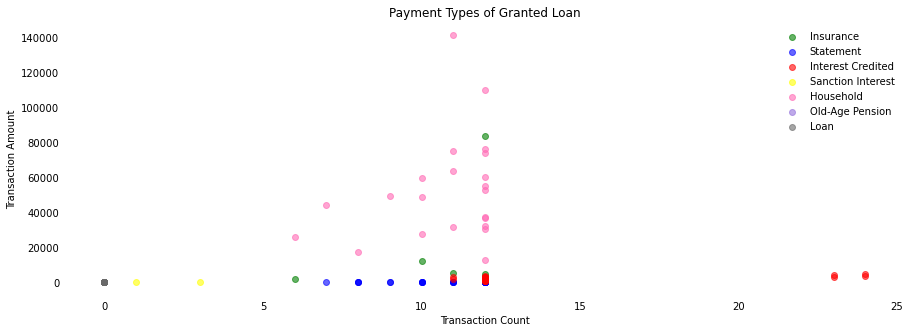

In [111]:
#Creating the scatter plot of transaction types of Granted Loan
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(granted_loan.insurance_pmt_count, granted_loan.insurance_pmt_amount, color='green', label='Insurance', alpha = 0.6)
ax.scatter(granted_loan.statement_pmt_count, granted_loan.statement_pmt_amount, color='blue', label='Statement', alpha = 0.6)
ax.scatter(granted_loan.interest_credited_count, granted_loan.interest_credited_amount, color='red', label='Interest Credited', alpha = 0.6)
ax.scatter(granted_loan.sanction_interest_count, granted_loan.sanction_interest_amount, color='yellow', label='Sanction Interest', alpha = 0.6)
ax.scatter(granted_loan.household_pmt_count, granted_loan.household_pmt_amount, color='hotpink', label='Household', alpha = 0.6)
ax.scatter(granted_loan.old_age_pension_count, granted_loan.old_age_pension_amount, color='mediumpurple', label='Old-Age Pension', alpha = 0.6)
ax.scatter(granted_loan.loan_pmt_count, granted_loan.loan_pmt_amount, color='dimgray', label='Loan', alpha = 0.6)

#ax.set_xscale('log')
#ax.set_yscale('log')

#Formatting the plot
#ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Payment Types of Granted Loan')
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Transaction Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(frameon=False)
    
plt.show()

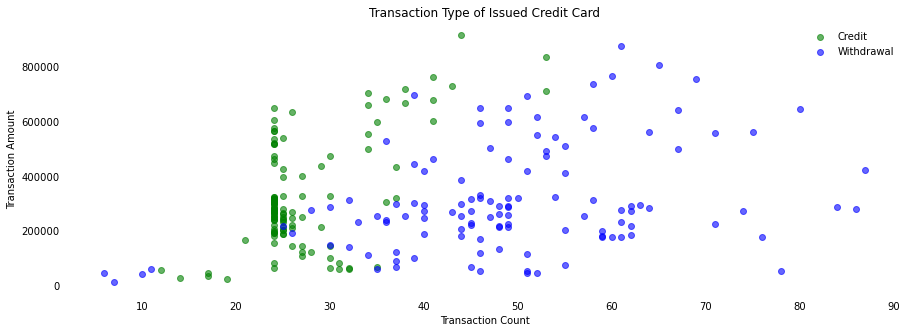

In [112]:
#Creating the scatter plot of transaction types of Issued Credit Card
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(issued_cc.credit_count, issued_cc.credit_amount, color='green', label='Credit', alpha = 0.6)
ax.scatter(issued_cc.wd_count, issued_cc.wd_amount, color='blue', label='Withdrawal', alpha = 0.6)

#ax.set_xscale('log')
#ax.set_yscale('log')

#Formatting the plot
#ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Transaction Type of Issued Credit Card')
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Transaction Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(frameon=False)
    
plt.show()

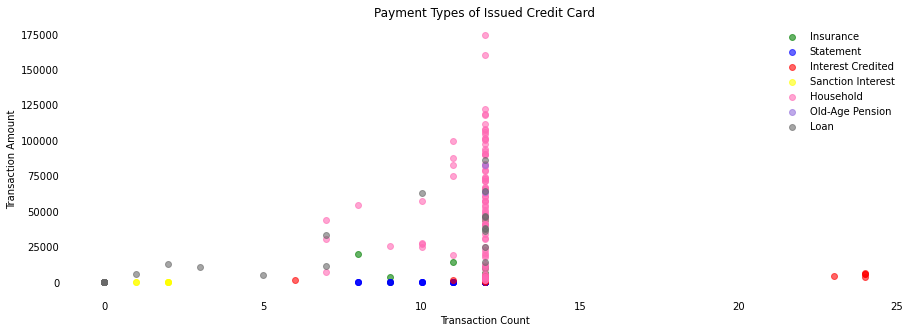

In [113]:
#Creating the scatter plot of transaction types of Granted Loan
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(issued_cc.insurance_pmt_count, issued_cc.insurance_pmt_amount, color='green', label='Insurance', alpha = 0.6)
ax.scatter(issued_cc.statement_pmt_count, issued_cc.statement_pmt_amount, color='blue', label='Statement', alpha = 0.6)
ax.scatter(issued_cc.interest_credited_count, issued_cc.interest_credited_amount, color='red', label='Interest Credited', alpha = 0.6)
ax.scatter(issued_cc.sanction_interest_count, issued_cc.sanction_interest_amount, color='yellow', label='Sanction Interest', alpha = 0.6)
ax.scatter(issued_cc.household_pmt_count, issued_cc.household_pmt_amount, color='hotpink', label='Household', alpha = 0.6)
ax.scatter(issued_cc.old_age_pension_count, issued_cc.old_age_pension_amount, color='mediumpurple', label='Old-Age Pension', alpha = 0.6)
ax.scatter(issued_cc.loan_pmt_count, issued_cc.loan_pmt_amount, color='dimgray', label='Loan', alpha = 0.6)

#ax.set_xscale('log')
#ax.set_yscale('log')

#Formatting the plot
#ax.set_xticklabels(['Granted_Loan', 'Not_Granted_Loan', 'Issued_CC', 'Not_Issued_CC'])
ax.set_title('Payment Types of Issued Credit Card')
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Transaction Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(frameon=False)
    
plt.show()

#### Demographics

<AxesSubplot:xlabel='age_group', ylabel='loan_granted_1997'>

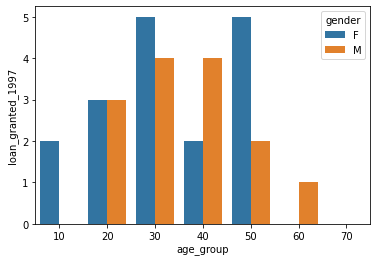

In [114]:
import seaborn as sns
x=base_table.groupby(['gender','age_group'])['loan_granted_1997'].sum().reset_index()
sns.barplot(data=x, x='age_group', y='loan_granted_1997', hue='gender')

<AxesSubplot:xlabel='age_group', ylabel='credit_issued_1997'>

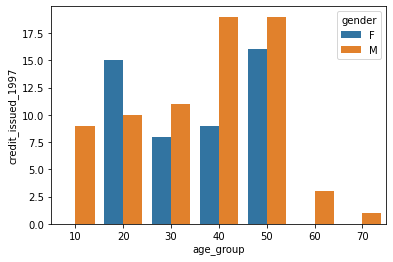

In [115]:
x=base_table.groupby(['gender','age_group'])['credit_issued_1997'].sum().reset_index()
sns.barplot(data=x, x='age_group', y='credit_issued_1997', hue='gender')

In [116]:
print(granted_loan["Client_Female"].value_counts())
print(issued_cc["Client_Male"].value_counts())

1    17
0    14
Name: Client_Female, dtype: int64
1    72
0    48
Name: Client_Male, dtype: int64


In [117]:
print(issued_cc["age_group"].value_counts())
print(granted_loan["age_group"].value_counts())

50    35
40    28
20    25
30    19
10     9
60     3
70     1
Name: age_group, dtype: int64
30    9
50    7
40    6
20    6
10    2
60    1
Name: age_group, dtype: int64


<AxesSubplot:title={'center':'Repartition of Loan granted in 1997 per Region'}>

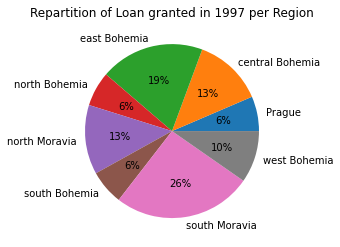

In [118]:
# repartition of loan granted 1997 by region
base_table.groupby(['region']).sum().plot(kind='pie', y='loan_granted_1997', autopct='%1.0f%%',
                                title='Repartition of Loan granted in 1997 per Region', ylabel= '', legend = '')

<AxesSubplot:title={'center':'Repartition of Credit Card issued in 1997 per Region'}>

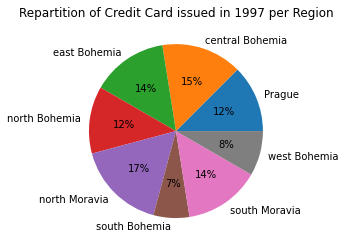

In [119]:
# repartition of loan granted 1997 by region
base_table.groupby(['region']).sum().plot(kind='pie', y='credit_issued_1997', autopct='%1.0f%%',
                                title='Repartition of Credit Card issued in 1997 per Region', ylabel= '', legend = '')

In [120]:
base_table.to_csv(directory + "base_table.csv")